## Exploratory data analysis of the Crimes by neighborhood of baltimore city
> Data Set: Crimes_By_Neighborhood (1).csv<br>
source: https://data.baltimorecity.gov/Crime/Crimes-By-Neighborhood/2nh2-stru <br>
<br>
__Observation__ : Data set is a csv file which consists of crimes recorded by neighborhood of the baltimore city. It consists of crimes recorded by date, crime code, location where crime has been taken place, description of the crime, weapon used during the crime, district and neighborhood of the crimes from the year 1963 to 2019.<br>

__Conclusion__ : From this data set and the plots, I observed that in the year 2017 many number of crimes has been recorded. Most of the crimes has taken place in the Northeast district and out of the crimes recorded larceny cases are the most.

>Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime


> Reading Crimes by neighborhood of baltimore city csv data as Dataframe using pandas

In [2]:
data_frame = pd.read_csv('Crimes_By_Neighborhood (1).csv', sep=',',engine='python')

In [3]:
data_frame.shape      # To find rows, columns of the data frame

(276281, 7)

In [4]:
data_frame.head()     #To display first 5 rows of the data frame

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,08/05/2015,6E,2500 MARBOURNE AVE,LARCENY,NaN,SOUTHERN,000
1,02/07/2015,4C,2 SUZAN ST,AGG. ASSAULT,OTHER,NORTHERN,000
2,02/03/2015,4E,40 SUZAN ST,COMMON ASSAULT,NaN,NORTHERN,000
3,12/07/2014,6D,1 SUZAN ST,LARCENY FROM AUTO,NaN,CENTRAL,000
4,11/12/2014,3B,1 SUZAN ST,ROBBERY - STREET,NaN,CENTRAL,000


> Finding Number of Null values in each column 

In [5]:
null_columns=data_frame.columns[data_frame.isnull().any()]
data_frame[null_columns].isnull().sum()

Location          1176
Weapon          218417
Neighborhood     10488
dtype: int64

> As we found some null values, filling the null values in the columns Location and neighborhood with 'None'

In [6]:
_ = data_frame['Neighborhood'].fillna('None')
_ = data_frame['Location'].fillna('None')

> Dropping the column Weapon from the Data frame
* Column weapon is dropped as the maximum number of values in the column are null.

In [7]:
df = data_frame.drop('Weapon', axis = 1)
df.head()

,CrimeDate,CrimeCode,Location,Description,District,Neighborhood
0,08/05/2015,6E,2500 MARBOURNE AVE,LARCENY,SOUTHERN,000
1,02/07/2015,4C,2 SUZAN ST,AGG. ASSAULT,NORTHERN,000
2,02/03/2015,4E,40 SUZAN ST,COMMON ASSAULT,NORTHERN,000
3,12/07/2014,6D,1 SUZAN ST,LARCENY FROM AUTO,CENTRAL,000
4,11/12/2014,3B,1 SUZAN ST,ROBBERY - STREET,CENTRAL,000


> Finding the data types of all columns

In [8]:
data_frame.dtypes

CrimeDate       object
CrimeCode       object
Location        object
Description     object
Weapon          object
District        object
Neighborhood    object
dtype: object

> Changing the data type of the column CrimeDate from object to datatime

In [9]:
df.CrimeDate = pd.to_datetime(df.CrimeDate)
df.head()

,CrimeDate,CrimeCode,Location,Description,District,Neighborhood
0,2015-08-05,6E,2500 MARBOURNE AVE,LARCENY,SOUTHERN,000
1,2015-02-07,4C,2 SUZAN ST,AGG. ASSAULT,NORTHERN,000
2,2015-02-03,4E,40 SUZAN ST,COMMON ASSAULT,NORTHERN,000
3,2014-12-07,6D,1 SUZAN ST,LARCENY FROM AUTO,CENTRAL,000
4,2014-11-12,3B,1 SUZAN ST,ROBBERY - STREET,CENTRAL,000


> * Creating a new column 'Year' with only years from the CrimeDate<br>
> * Counting number of crimes taken place in each year

In [10]:
df['Year'] = df.CrimeDate.dt.year
df.head()

,CrimeDate,CrimeCode,Location,Description,District,Neighborhood,Year
0,2015-08-05,6E,2500 MARBOURNE AVE,LARCENY,SOUTHERN,000,2015
1,2015-02-07,4C,2 SUZAN ST,AGG. ASSAULT,NORTHERN,000,2015
2,2015-02-03,4E,40 SUZAN ST,COMMON ASSAULT,NORTHERN,000,2015
3,2014-12-07,6D,1 SUZAN ST,LARCENY FROM AUTO,CENTRAL,000,2014
4,2014-11-12,3B,1 SUZAN ST,ROBBERY - STREET,CENTRAL,000,2014


In [11]:
df.Year.value_counts()

2017    52160
2016    48763
2018    48399
2015    48193
2014    45307
2019    33380
2013       15
2012       10
2011        8
2009        7
2008        5
2007        4
2010        3
2001        3
2000        3
2004        2
1999        2
1998        2
1995        2
1993        2
1981        1
1969        1
1977        1
1978        1
1980        1
2003        1
1982        1
1985        1
1988        1
2006        1
1963        1
Name: Year, dtype: int64

> As the Number of Crimes recorded from the year 1963 to 2013 are negligible, Sorting the data frame with the years  2014-2019 to plot Crimes by year graph

In [12]:
df_final = df[df.Year > 2013]
df_final

,CrimeDate,CrimeCode,Location,Description,District,Neighborhood,Year
0,2015-08-05,6E,2500 MARBOURNE AVE,LARCENY,SOUTHERN,000,2015
1,2015-02-07,4C,2 SUZAN ST,AGG. ASSAULT,NORTHERN,000,2015
2,2015-02-03,4E,40 SUZAN ST,COMMON ASSAULT,NORTHERN,000,2015
3,2014-12-07,6D,1 SUZAN ST,LARCENY FROM AUTO,CENTRAL,000,2014
4,2014-11-12,3B,1 SUZAN ST,ROBBERY - STREET,CENTRAL,000,2014
5,2014-09-12,6G,40 SUZAN ST,LARCENY,NORTHERN,000,2014
6,2014-09-12,6G,40 SUZAN ST,LARCENY,NORTHERN,000,2014
7,2014-03-28,5A,10 SUZAN ST,BURGLARY,NORTHERN,000,2014
8,2016-03-18,5A,100 N LAKEWOOD AVE,BURGLARY,SOUTHEAST,116102,2016
9,2019-09-11,4C,3400 LYNDALE AVE,AGG. ASSAULT,NORTHEAST,4X4,2019


>* <b>Bar graph plotted between year and No. of crimes
    
This Bar graph shows, number of recorded crimes that has taken place from the year 2014-2019
* From the year 2014-2019, In the year 2017 more number of crimes cases has been recorded
* From the year 2014, Crimes rate has been increasing every year until 2017 and then in the year 2018 crime rate has been decreased slightly.
    

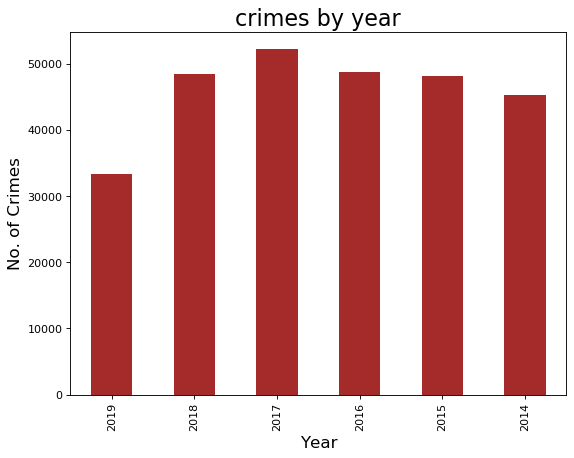

In [13]:
figure(num=None, figsize=(8, 6), dpi=80)  # Creates a new figure with adjustable parameters
df_final.Year.value_counts().sort_index(ascending = 'TRUE').plot(kind = 'bar', color = 'brown') #ploting bargraph
plt.gca().invert_xaxis()                      # To invert X-axis
plt.xlabel('Year', fontsize = '15')           # To set x axis label
plt.ylabel('No. of Crimes', fontsize = '15')  # To set y axis label
plt.title('crimes by year', fontsize = '20')  # To set title 
plt.show()                                    #to show the plot

>Counting the crimes recorded based on the types of crimes

In [14]:
df.Description.value_counts()

LARCENY                 61653
COMMON ASSAULT          45087
BURGLARY                40292
LARCENY FROM AUTO       36928
AGG. ASSAULT            29761
AUTO THEFT              24473
ROBBERY - STREET        19624
ROBBERY - COMMERCIAL     4918
SHOOTING                 3631
ROBBERY - RESIDENCE      2785
ROBBERY - CARJACKING     2330
RAPE                     1797
HOMICIDE                 1771
ARSON                    1231
Name: Description, dtype: int64

>* <b>Bar graph plotted between No. of crimes and crime Description
    
This Bar graph shows, number of types of crimes that has been taken place since the crimes are recorded
* Larceny is the most recorded crime with around 61000 cases
* Arson cases are the least among the recorded cases 

    

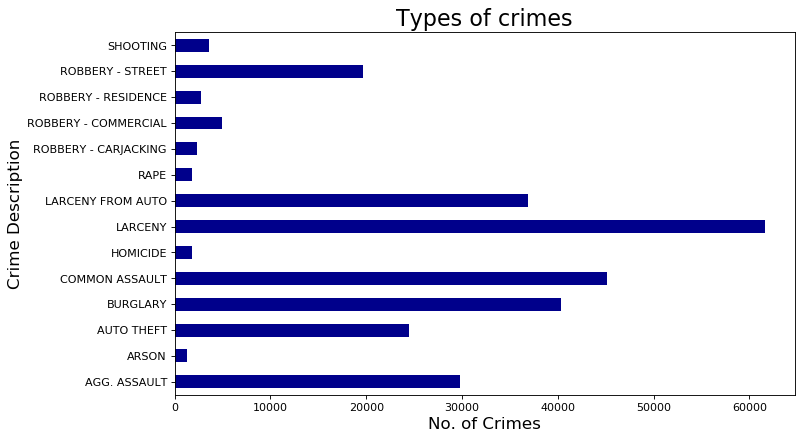

In [15]:
figure(num=None, figsize=(10, 6), dpi=80)
df.Description.value_counts().sort_index().plot(kind = 'barh',color = 'darkblue')
plt.ylabel('Crime Description', fontsize = '15')
plt.xlabel('No. of Crimes', fontsize = '15')
plt.title('Types of crimes', fontsize = '20')
plt.show()

> Counting number of crimes recorded in each district

In [16]:
df.District.value_counts()

NORTHEAST    41565
SOUTHEAST    40498
SOUTHERN     31362
CENTRAL      31280
NORTHERN     30275
SOUTHWEST    28322
NORTHWEST    26604
EASTERN      24108
WESTERN      22127
UNKNOWN        140
Name: District, dtype: int64

>* <b>Bar graph plotted between No. of crimes and District in which crimes are taken place
    
This Bar graph shows, number of crimes that has been taken place in a district in baltimore area since the crimes are recorded
* North east district has the more number of crimes recorded i.e, 41565 and the least is western district i.e., 22127.

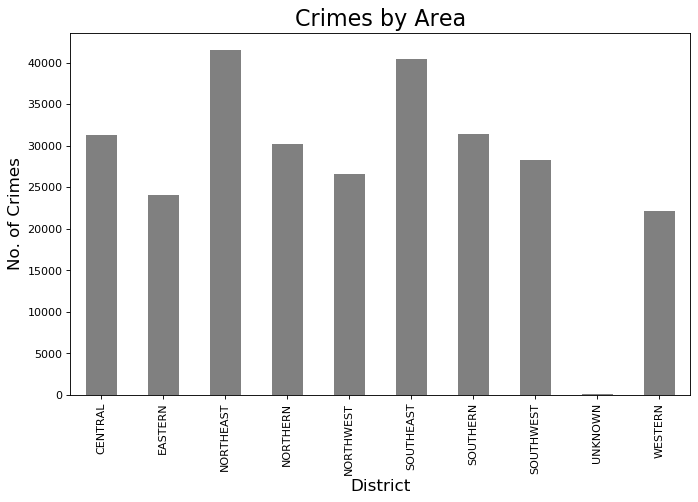

In [17]:
figure(num=None, figsize=(10, 6), dpi=80)
df.District.value_counts().sort_index(ascending = 'TRUE').plot(kind = 'bar', color = 'gray')
plt.xlabel('District', fontsize = '15')
plt.ylabel('No. of Crimes', fontsize = '15')
plt.title('Crimes by Area', fontsize = '20')
plt.show()

__Learned__:
    * Using real time data sets for data analysis
    * Working with Pandas 
    * Data cleaning
    * Working with Data visualization using matplotlib